<a href="https://colab.research.google.com/github/BrisseidaEsmeraldaGonzalezCabriales/InteligenciaArtificial_y_RedesNeuronales_UANL/blob/main/ACTIVIDAD_5_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [97]:
# Esmeralda Gonzalez - 1974257
# Análisis y normalización de datos de sensores de un robot

In [31]:
# 1. Importar bibliotecas necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [36]:
# 2. Cargar el dataset desde GitHub
url = "https://raw.githubusercontent.com/dilp90/InteligenciaArtificial_y_RedesNeuronales_UANL_FIME/main/MachineLearning/Datasets/robot_sensors.csv"
df = pd.read_csv(url)

In [58]:
# 3. Mostrar las primeras filas del dataset
print("Primeras 10 filas del dataset:")
print(df.head(10))

Primeras 10 filas del dataset:
   Tiempo (s)  Distancia (cm)  Velocidad (cm/s)  Temperatura (°C)
0           0       43.708611          9.256646         23.925585
1           1       95.564288         27.095047         23.704682
2           2       75.879455         43.647292         33.593819
3           3       63.879264         36.611244         23.743193
4           4       24.041678         40.328057         24.079246
5           5       24.039507         32.939168         31.390974
6           6       15.227525         34.613828         26.746098
7           7       87.955853         42.459783         31.650658
8           8       64.100351         12.483400         20.980492
9           9       73.726532         24.471248         27.313568


In [65]:
# 4. Limpiar los datos
# Eliminar filas con valores nulos
df_limpio = df.dropna()

print(f"Tamaño después de eliminar filas nulas: {df_limpio.shape}")

# Mostrar primeras 90 filas del dataset limpio
print("\nPrimeras 90 filas después de eliminar valores nulos:")
print(df_limpio.head(90))

Tamaño después de eliminar filas nulas: (913, 4)

Primeras 90 filas después de eliminar valores nulos:
    Tiempo (s)  Distancia (cm)  Velocidad (cm/s)  Temperatura (°C)
0            0       43.708611          9.256646         23.925585
1            1       95.564288         27.095047         23.704682
2            2       75.879455         43.647292         33.593819
3            3       63.879264         36.611244         23.743193
4            4       24.041678         40.328057         24.079246
..         ...             ...               ...               ...
93          93       60.514948         25.634426         27.849944
94          94       79.387046         11.533491         24.307069
95          95       54.441604          8.826402         31.892816
96          96       57.045955         11.024310         28.663900
97          97       48.478692          9.321913         29.518736

[90 rows x 4 columns]


In [93]:
# b) Eliminar valores atípicos
# Velocidad negativa, distancia no positiva, temperatura fuera de rango razonable
df = df[
    (df['Velocidad (cm/s)'] >= 0) &
    (df['Distancia (cm)'] > 0) &
    (df['Temperatura (°C)'] > -20) &
    (df['Temperatura (°C)'] < 60)
]
print(" Datos limpios.\nTotal de registros válidos:", len(df))

# Mostrar tamaño después de filtrar
print(f"Tamaño después de eliminar velocidades negativas: {df.shape}")

# Mostrar primeras 10 filas del dataset filtrado
print("\nPrimeras 10 filas después del filtrado:")
print(df.head(10))

 Datos limpios.
Total de registros válidos: 913
Tamaño después de eliminar velocidades negativas: (913, 4)

Primeras 10 filas después del filtrado:
   Tiempo (s)  Distancia (cm)  Velocidad (cm/s)  Temperatura (°C)
0           0       43.708611          9.256646         23.925585
1           1       95.564288         27.095047         23.704682
2           2       75.879455         43.647292         33.593819
3           3       63.879264         36.611244         23.743193
4           4       24.041678         40.328057         24.079246
5           5       24.039507         32.939168         31.390974
6           6       15.227525         34.613828         26.746098
7           7       87.955853         42.459783         31.650658
8           8       64.100351         12.483400         20.980492
9           9       73.726532         24.471248         27.313568


In [73]:
# 5. Normalizar los datos con Min-Max Scaling

# Copiamos el dataframe para no alterar el original
df_normalized = df.copy()
# Lista de columnas numéricas a normalizar
numerical_cols = ['Distancia (cm)', 'Velocidad (cm/s)', 'Temperatura (°C)']
print(" Normalizando columnas numéricas...\n")

for col in numerical_cols:
    min_val = df[col].min()
    max_val = df[col].max()
    df_normalized[col] = (df[col] - min_val) / (max_val - min_val)
    print(f"{col} → Min: {min_val}, Max: {max_val}")

print("\nNormalización completada. primeras filas normalizadas:")
print(df_normalized[numerical_cols].head(20))


 Normalizando columnas numéricas...

Distancia (cm) → Min: 10.41688207, Max: 99.9745906
Velocidad (cm/s) → Min: 0.16091318, Max: 49.97068629
Temperatura (°C) → Min: 20.00017452, Max: 34.96731284

Normalización completada. primeras filas normalizadas:
    Distancia (cm)  Velocidad (cm/s)  Temperatura (°C)
0         0.371735          0.182609          0.262269
1         0.950755          0.540740          0.247509
2         0.730954          0.873049          0.908233
3         0.596960          0.731791          0.250082
4         0.152134          0.806411          0.272535
5         0.152110          0.658069          0.761054
6         0.053716          0.691690          0.450716
7         0.865799          0.849208          0.778404
8         0.599429          0.247391          0.065498
9         0.706915          0.488064          0.488630
10        0.016031          0.218824          0.033676
11        0.970045          0.988209          0.062779
12        0.831899          0.9444

In [86]:
# 6. Visualización de los datos normalizados con gráficas de curva usando matplotlib
import matplotlib.pyplot as plt
sigma = 2  # Ajusta el nivel de suavizado
dist_suave = gaussian_filter1d(df_normalized['Distancia (cm)'], sigma=sigma)
vel_suave = gaussian_filter1d(df_normalized['Velocidad (cm/s)'], sigma=sigma)
temp_suave = gaussian_filter1d(df_normalized['Temperatura (°C)'], sigma=sigma)

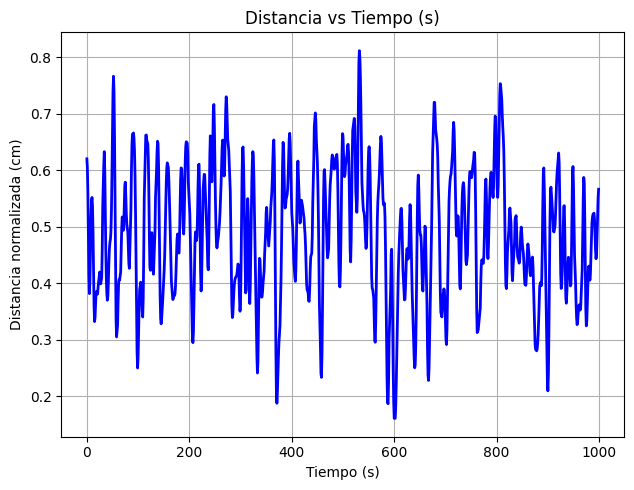

In [92]:
# Graficar
plt.figure(figsize=(18,5))

# Gráfica 1: Distancia vs Tiempo
plt.subplot(1, 3, 1)
plt.plot(df_normalized['Tiempo (s)'], dist_suave, color='blue', linewidth=2)
plt.title('Distancia vs Tiempo (s)')
plt.xlabel('Tiempo (s)')
plt.ylabel('Distancia normalizada (cm)')
plt.grid(True)
plt.tight_layout() # Ajusta los subplots para evitar superposición
plt.show()

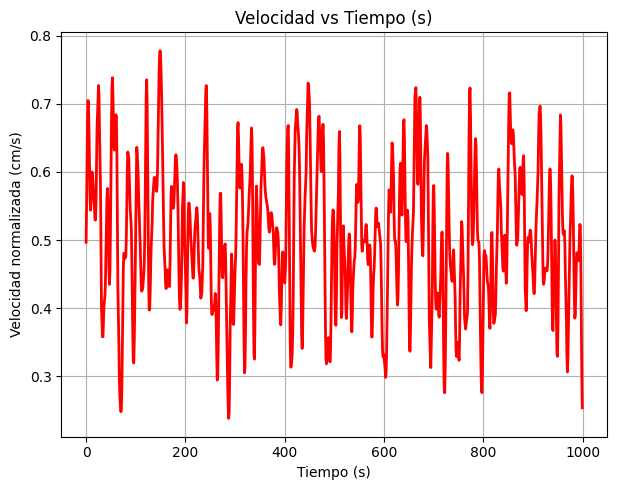

In [91]:
# Graficar
plt.figure(figsize=(18,5))
# Gráfica 2: Velocidad vs Tiempo
plt.subplot(1, 3, 2)
plt.plot(df_normalized['Tiempo (s)'], vel_suave, color='red', linewidth=2)
plt.title('Velocidad vs Tiempo (s)')
plt.xlabel('Tiempo (s)')
plt.ylabel('Velocidad normalizada (cm/s)')
plt.grid(True)
plt.tight_layout() # Ajusta los subplots para evitar superposición
plt.show()

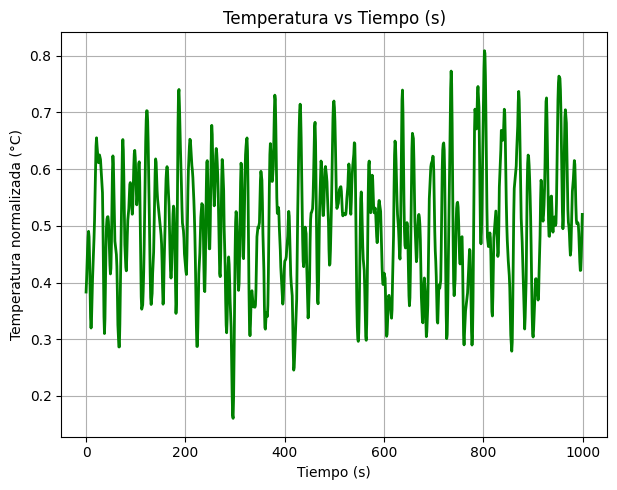

In [90]:
# Graficar
plt.figure(figsize=(18,5))
# Gráfica 3: Temperatura vs Tiempo
plt.subplot(1, 3, 3)
plt.plot(df_normalized['Tiempo (s)'], temp_suave, color='green', linewidth=2)
plt.title('Temperatura vs Tiempo (s)')
plt.xlabel('Tiempo (s)')
plt.ylabel('Temperatura normalizada (°C)')
plt.grid(True)

plt.tight_layout() # Ajusta los subplots para evitar superposición
plt.show()

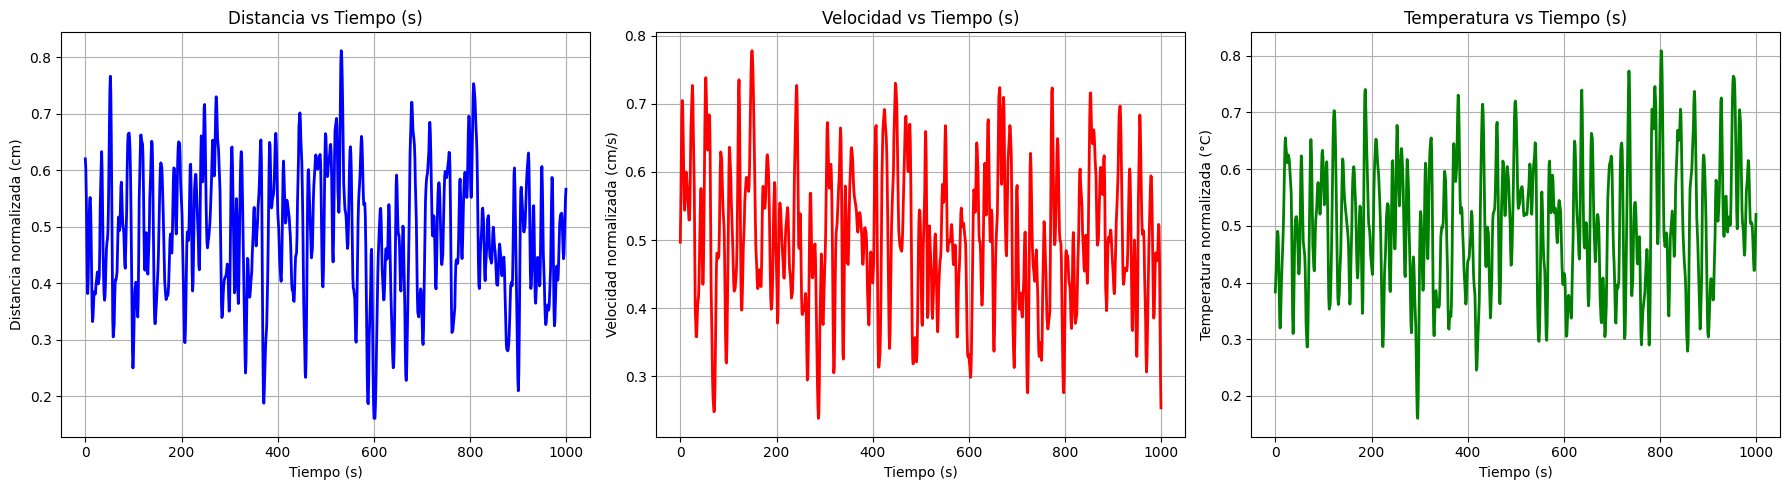

In [83]:
# Suavizar las series para que las curvas se vean más suaves
from scipy.ndimage import gaussian_filter1d

sigma = 2  # Ajusta el nivel de suavizado
dist_suave = gaussian_filter1d(df_normalized['Distancia (cm)'], sigma=sigma)
vel_suave = gaussian_filter1d(df_normalized['Velocidad (cm/s)'], sigma=sigma)
temp_suave = gaussian_filter1d(df_normalized['Temperatura (°C)'], sigma=sigma)

# Graficar
plt.figure(figsize=(18,5))

# Gráfica 1: Distancia vs Tiempo
plt.subplot(1, 3, 1)
plt.plot(df_normalized['Tiempo (s)'], dist_suave, color='blue', linewidth=2)
plt.title('Distancia vs Tiempo (s)')
plt.xlabel('Tiempo (s)')
plt.ylabel('Distancia normalizada (cm)')
plt.grid(True)

# Gráfica 2: Velocidad vs Tiempo
plt.subplot(1, 3, 2)
plt.plot(df_normalized['Tiempo (s)'], vel_suave, color='red', linewidth=2)
plt.title('Velocidad vs Tiempo (s)')
plt.xlabel('Tiempo (s)')
plt.ylabel('Velocidad normalizada (cm/s)')
plt.grid(True)

# Gráfica 3: Temperatura vs Tiempo
plt.subplot(1, 3, 3)
plt.plot(df_normalized['Tiempo (s)'], temp_suave, color='green', linewidth=2)
plt.title('Temperatura vs Tiempo (s)')
plt.xlabel('Tiempo (s)')
plt.ylabel('Temperatura normalizada (°C)')
plt.grid(True)

plt.tight_layout() # Ajusta los subplots para evitar superposición
plt.show()

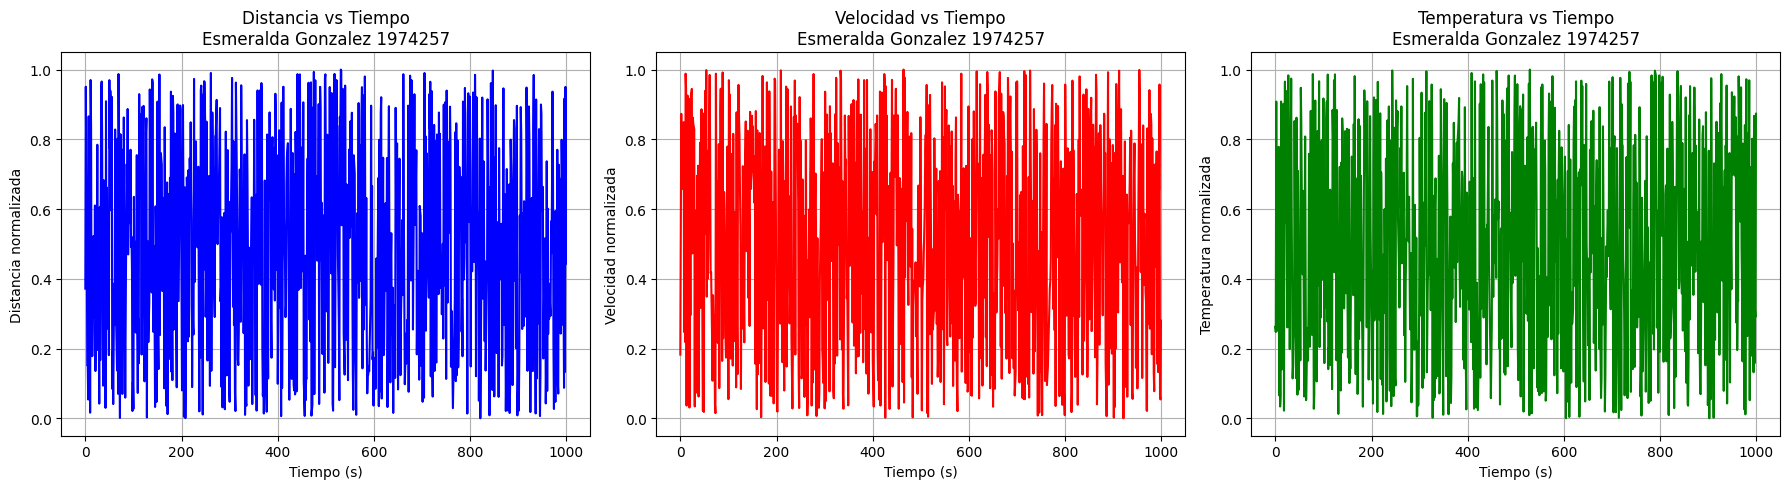

In [96]:
# Graficar sin suavizado
plt.figure(figsize=(18,5))

# Gráfica 1: Distancia
plt.subplot(1, 3, 1)
plt.plot(df_normalized['Tiempo (s)'], df_normalized['Distancia (cm)'], color='blue', linewidth=1.5)
plt.title('Distancia vs Tiempo\nEsmeralda Gonzalez 1974257')
plt.xlabel('Tiempo (s)')
plt.ylabel('Distancia normalizada')
plt.grid(True)

# Gráfica 2: Velocidad
plt.subplot(1, 3, 2)
plt.plot(df_normalized['Tiempo (s)'], df_normalized['Velocidad (cm/s)'], color='red', linewidth=1.5)
plt.title('Velocidad vs Tiempo\nEsmeralda Gonzalez 1974257')
plt.xlabel('Tiempo (s)')
plt.ylabel('Velocidad normalizada')
plt.grid(True)

# Gráfica 3: Temperatura
plt.subplot(1, 3, 3)
plt.plot(df_normalized['Tiempo (s)'], df_normalized['Temperatura (°C)'], color='green', linewidth=1.5)
plt.title('Temperatura vs Tiempo\nEsmeralda Gonzalez 1974257')
plt.xlabel('Tiempo (s)')
plt.ylabel('Temperatura normalizada')
plt.grid(True)

plt.tight_layout()
plt.show()
